### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go # we can not use express plots
from plotly.subplots import make_subplots # creating subplots

### Utility functions

In [341]:
!jt -t oceans16 -f roboto -fs 9 -N -T -cellw 90%

In [342]:
def clear_quotes_all(df):
    col_list = df.columns
    for col in col_list:
        df[col] = df[col].replace("'", "")
    return df

def create_categorical(xparam, mapping):
    x = xparam.replace("'","") 
    if x in mapping.keys():
        return mapping[x]
    else:
        return -1    

def clear_quotes(x):
    return x.replace("'", "").replace('"','')

def plot_null_check(s): 
    null_series = s.isnull().sum()/data.shape[0] * 100
    fig = px.bar(null_series, text='value')
    fig.update_traces(text= [f'{val:.2f}%' for val in null_series])
    fig.show()

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [343]:
data = pd.read_csv('data/coupons.csv')

In [344]:
data.head(2).T

,0,1
destination,No Urgent Place,No Urgent Place
passanger,Alone,Friend(s)
weather,Sunny,Sunny
temperature,55,80
time,2PM,10AM
coupon,Restaurant(<20),Coffee House
expiration,1d,2h
gender,Female,Female
age,21,21
maritalStatus,Unmarried partner,Unmarried partner


In [345]:
# income is also a categorical column with ranges being defined. it needs to be cleaned to removed $, spaces and replacing - (hyphen) with _ (underscore)
data['income'] = data['income'].apply(lambda x: x.replace(' ', '').replace('$', '').replace('-','_'))
age_order = ['below21','21', '26','31','36','41','46','50plus']
data['age_cat'] = pd.Categorical(data['age'], categories=age_order, ordered=True)
data['passanger'] = data['passanger'].str.translate({ord(i):None for i in '() '}) 

#Initialize a map to capture metrics
metrics = {}

<Axes: xlabel='time', ylabel='count'>

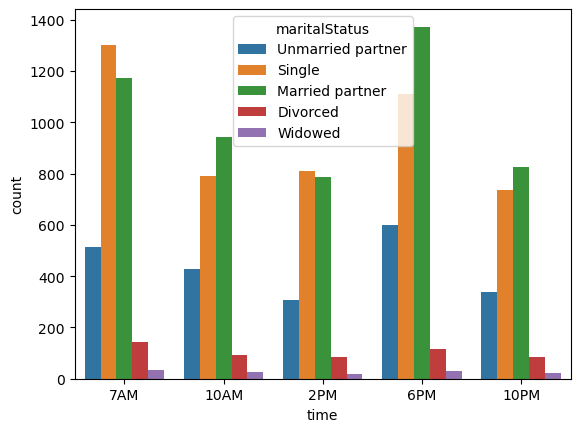

In [346]:
sns.countplot(data, x='time', order=['7AM', '10AM', '2PM', '6PM', '10PM'], hue='maritalStatus')

2. Investigate the dataset for missing or problematic data.

In [347]:
# Check for nulls and either fill or remove the columns. In our case, `car` column is 99% null and hence its not point having the column for the current analysi and hence could dropped, .The only others pending are Bar, CoffeeHouse, carryAway, etc. 
plot_null_check(data);

/Users/vensan/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



3. Decide what to do about your missing data -- drop, replace, other...

In [348]:
# Based on the null values 'car' column has more than 90% null values and may not have much of an impact for the current dataset hence it will be dropped or removed. 
#data.drop('car', axis=1, inplace=True)
# For the others lets understand the possible distribution of nan or nulls
data_org = data.copy()
data = data.query('Bar.notnull()')
data.drop('car', axis=1, inplace=True)

In [349]:
plot_null_check(data);

/Users/vensan/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [350]:
data.dropna(inplace=True)

In [351]:
#what is the % of data that would be lost if all na fields are removed. It looks like 4 to 5%. for the preliminary analysis its safe to remove all the Nan's
not_null_data_pct = data.shape[0]/data_org.shape[0]
metrics['non_null_data_pct'] = not_null_data_pct 

4. What proportion of the total observations chose to accept the coupon? 



56.93% of the people chose to accept the coupon. 

In [359]:
#Generate the proportion of accepted vs not accepted. Plot using plotly and set the 
accepted_not_accepted = data.groupby('Y')[['Y']].count().rename(columns={'Y': 'Accepted'}).reset_index()
accepted_not_accepted = (accepted_not_accepted/data.shape[0]) *100
metrics['accepted_pct'] = accepted_not_accepted['Accepted'] [1]
fig = px.bar(accepted_not_accepted['Accepted'], text='value',width=300, height=400,title='Accept vs No Accept' )
fig.update_traces(text= [f'{val:.2f}%' for val in accepted_not_accepted['Accepted']], showlegend=False )
fig.show();



/Users/vensan/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [361]:
metrics

{'non_null_data_pct': 0.9523021128981394, 'accepted_pct': 56.93352098683666}

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

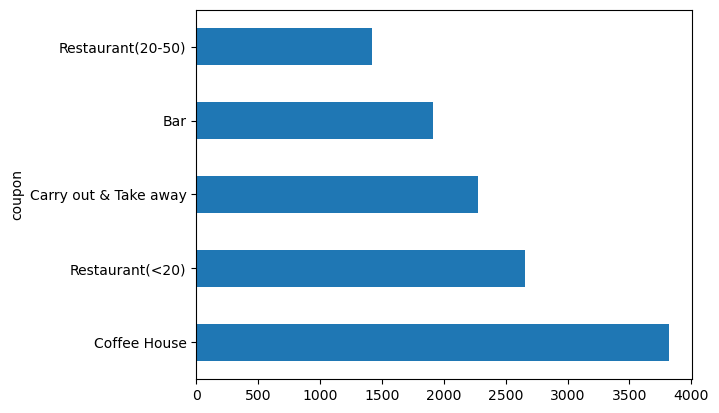

In [310]:
data.coupon.fillna('others').value_counts().plot(kind='barh')

In [311]:
coupon_categories = {'Coffee House': 'coffee_house','Restaurant(<20)': 'restaurant_lt_20','Restaurant(20-50)': 'restaurant_bt_20_50','Carry out & Take away': 'take_away', 'Bar': 'restaurant_bar'}
data['coupon_cat'] = data['coupon'].apply(create_categorical, mapping=coupon_categories)

6. Use a histogram to visualize the temperature column.

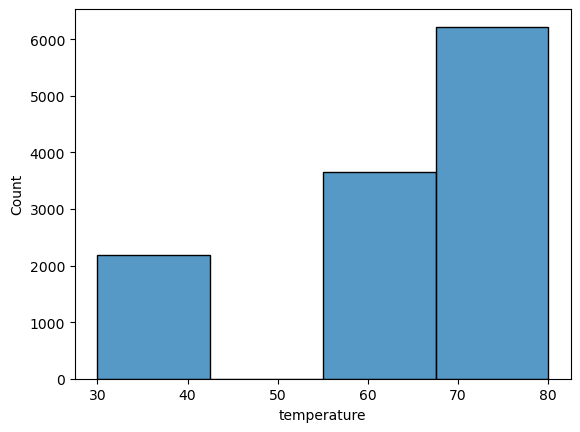

In [312]:
sns.histplot(data, x='temperature', bins=4);

In [313]:
data.temperature.value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [314]:
df_bar_only_coupons = data[data['coupon'] == 'Bar']
df_bar_only_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_cat,coupon_cat
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,21,restaurant_bar
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,21,restaurant_bar
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,less1,1,1,1,0,1,1,21,restaurant_bar
46,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,0,1,0,46,restaurant_bar
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,1,0,0,46,restaurant_bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friends,Sunny,80,10PM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,26,restaurant_bar
12664,No Urgent Place,Friends,Sunny,55,10PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,26,restaurant_bar
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,26,restaurant_bar
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,26,restaurant_bar


2. What proportion of bar coupons were accepted?


The analysis is to deep dive into what portion of the sample/population is Bar coupons. As seen below it constitutes to approximately, 15.9%. The next step would be check of the 15.6% what proportion was accepted. So, as we see again the `Distribution by Bar coupon acceptance` pie chart its like 41% 

In [315]:
# def analyze_coupon_by_column(analyzing_col_name, df, accept_col_name):
#     '''
#     This method would be used to analyze a column with regards to its impact on coupon acceptance
#     analyzing_col_name: This field would have string values like Bar, car, the column names
#     df: dataframe which needs transformation
#     accept_col_name: In our case it is 'Y'
    
#     This returns df1, df2 (df1 = dataframe having distribution by coupon, df2 = column specific distribution)
#     '''
#     df_bar_only_coupons = df[df['coupon'] == analyzing_col_name]
#     dist_coupons = df.groupby('coupon')[['coupon']].count().rename(columns={'coupon': 'count'}).reset_index()
#     bool_col = f'is_{analyze_coupon_by_column}'
#     dist_coupons[bool_col] = dist_coupons['coupon'] == analyzing_col_name
#     dist_bar_coupons = df_bar_only_coupons.groupby(accept_col_name)[[accept_col_name]].count().rename(columns={accept_col_name: 'count'}).reset_index()
#     return dist_coupons, dist_bar_coupons


# def plot_pie_dist(dist_coupons, dis_col_coupons, analyzing_col_name, accept_col_name)
#     '''
        
#     '''
#     fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 8])
#     ax0.pie(dist_coupons['count'],labels= dist_coupons['coupon'], autopct='%1.2f%%', explode=dist_coupons[bool_col], shadow=True)
#     ax1.pie(dist_bar_coupons['count'],labels= dist_bar_coupons[accept_col_name], autopct='%1.2f%%', shadow=True)

#     ax0.set_title('Distribution by Coupon Type')
#     ax1.set_title(f'Distribution by {analyzing_col_name} coupon acceptance ');
    
# def proportion_calc:
#     # Calculate the proportion of the accepted bar coupons to the overall bar coupons
#     accepted_bar_only = df_bar_only_coupons.query('Y == 1').shape[0]
#     proportion = accepted_bar_only/df_bar_only_coupons.shape[0]
#     print(f'Proportion of bar coupons which were accepted : {proportion * 100 : .2f}%')

In [383]:
# Create a coupons distribution dataframe (coupons is a categorical column) and also create a another dataframe by Accepted or not Accepted 

dist_coupons = data.groupby('coupon')[['coupon']].count().rename(columns={'coupon': 'count'}).reset_index()
dist_coupons['isBar'] = dist_coupons['coupon'] == 'Bar'
dist_bar_coupons = df_bar_only_coupons.groupby('Y')[['Y']].count().rename(columns={'Y': 'count'}).reset_index()

In [384]:
metrics

{'non_null_data_pct': 0.9523021128981394,
 'accepted_pct': 56.93352098683666,
 'bar_pct': 0    0.158374
 Name: count, dtype: float64,
 'bar_accept_pct': Series([], Name: count, dtype: float64)}

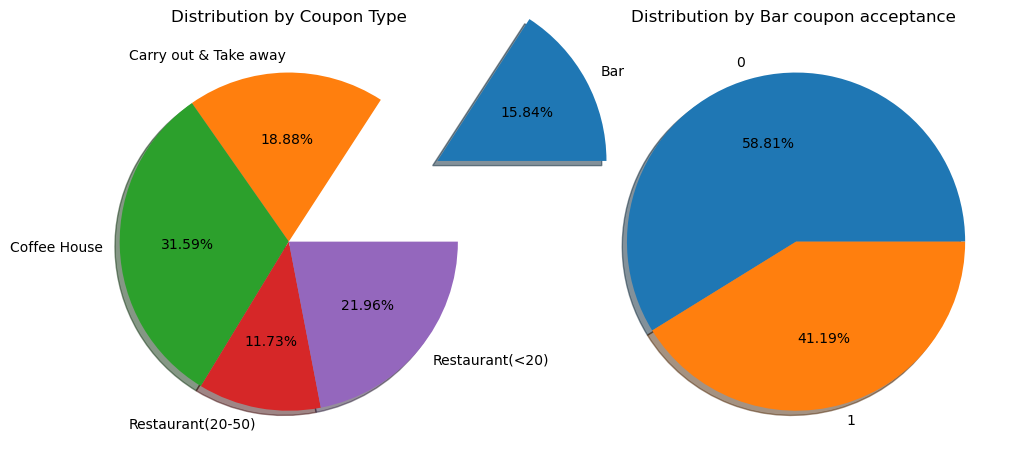

In [385]:
# Plot the distribution to understand how Bar coupons and its acceptance
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 8])
ax0.pie(dist_coupons['count'],labels= dist_coupons['coupon'], autopct='%1.2f%%', explode=dist_coupons['isBar'], shadow=True)
ax1.pie(dist_bar_coupons['count'],labels= dist_bar_coupons['Y'], autopct='%1.2f%%', shadow=True)

ax0.set_title('Distribution by Coupon Type')
ax1.set_title('Distribution by Bar coupon acceptance ');

In [386]:
# Calculate the proportion of the accepted bar coupons to the overall bar coupons
accepted_bar_only = df_bar_only_coupons.query('Y == 1').shape[0]
proportion = accepted_bar_only/df_bar_only_coupons.shape[0]

metrics['bar_accept_pct'] = proportion
print(f'Proportion of bar coupons which were accepted : {proportion * 100 : .2f}%')

Proportion of bar coupons which were accepted :  41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [387]:
# create two arrays one for <=3 times and another for >3 which would be used for separating the 
lt_list=['never','less1','1~3']
ge_list=['4~8', 'gt8']

df_bar_only_coupons_accepted = df_bar_only_coupons.query('Y == 1')[['Bar']]
# people who went fewer times and accepted 
lt = df_bar_only_coupons_accepted.query('Bar in @lt_list').shape[0]/df_bar_only_coupons_accepted.query('Bar in @ge_list').shape[0]
metrics['bar_lt_3_vs_gt_3'] = lt
print(f'The acceptance rate of those who went to bar 3 or fewer times was {lt:.2f} times MORE than those who when more frequently')

The acceptance rate of those who went to bar 3 or fewer times was 4.36 times MORE than those who when more frequently


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [388]:
gt_25_gt_1 = df_bar_only_coupons.query('Bar not in ["never","less1"] and age not in ["below21","21"]').shape[0]
ge_25_le_1 = df_bar_only_coupons.query('Bar in ["never","less1"] and age in ["below21","21"]').shape[0]
acceptance_rate = gt_25_gt_1/ge_25_le_1
acceptance_rate
metrics['accp_rate_bar_gt_1_age_gt_25'] = acceptance_rate
print(f'The acceptance rate of drivers who are going to bars more than once and over the age of 25 is approximately {acceptance_rate:.2f}')

The acceptance rate of drivers who are going to bars more than once and over the age of 25 is approximately 1.30


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [389]:
gt_1_no_kids_no_farm = df_bar_only_coupons.query('Bar not in ["never","less1"] and passanger != "Kids" and occupation != "Farming Fishing & Forestry"').shape[0]
total = df_bar_only_coupons.shape[0]
acceptance_rate = gt_1_no_kids_no_farm/(total - gt_1_no_kids_no_farm)
acceptance_rate
metrics['accp_rate_bar_gt_1_pgr_nt_kid_occ_nt_farm'] = acceptance_rate
print(f'The acceptance rate of drivers who are going to bars more than once, no kids along and occupation other than `farming, fishing or forestry` is approximately {acceptance_rate:.2f}')

The acceptance rate of drivers who are going to bars more than once, no kids along and occupation other than `farming, fishing or forestry` is approximately 0.38


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [390]:
gt_1_no_kids_not_widowed = df_bar_only_coupons.query('Bar not in ["never","less1"] and passanger != "Kids" and maritalStatus != "Widowed"').shape[0]
total = df_bar_only_coupons.shape[0]
acceptance_rate = gt_1_no_kids_not_widowed/(total - gt_1_no_kids_not_widowed)
acceptance_rate
metrics['accp_rate_gt_1_no_kids_not_widowed'] = acceptance_rate
print(f'The acceptance rate of drivers who are going to bars more than once, no kids along and not widowed is approximately {acceptance_rate:.2f}')

The acceptance rate of drivers who are going to bars more than once, no kids along and not widowed is approximately 0.38


In [391]:
gt_1_under_30 = df_bar_only_coupons.query('Bar not in ["never","less1"] and age.isin(["below21","21","26"]) ').shape[0]
total = df_bar_only_coupons.shape[0]
acceptance_rate = gt_1_under_30/(total - gt_1_under_30)
acceptance_rate
metrics['accp_rate_gt_1_under_30'] = acceptance_rate
print(f'The acceptance rate of drivers who are going to bars more than once, under the age of 30 is approximately {acceptance_rate:.2f}')

The acceptance rate of drivers who are going to bars more than once, under the age of 30 is approximately 0.21


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [397]:
# metrics helps to get the acceptance rates for the various scenarios that have been considered. This 
pd.DataFrame(metrics)

,non_null_data_pct,accepted_pct,bar_pct,bar_accept_pct,bar_lt_3_vs_gt_3,accp_rate_bar_gt_1_age_gt_25,accp_rate_bar_gt_1_pgr_nt_kid_occ_nt_farm,accp_rate_gt_1_no_kids_not_widowed,accp_rate_gt_1_under_30
0,0.952302,56.933521,0.158374,0.411918,4.360544,1.304207,0.383225,0.383225,0.20694


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  